<a href="https://colab.research.google.com/github/bhanu608/FMML/blob/main/module1/M1L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set random seed
rng = np.random.default_rng(seed=42)

In [ ]:
dataset = datasets.fetch_california_housing()
#print(dataset.DESCR)
# print(dataset.keys())
print(dataset.data.shape)
print(dataset.target.shape)

(20640, 8)
(20640,)


In [ ]:
type(dataset), dataset.DESCR

(sklearn.utils.Bunch,
 '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousan

In [ ]:
def NN1(traindata, trainlabel, query):
  diff = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

def NN(traindata, trainlabel, testdata):
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

In [ ]:
def split(data, label, percent):
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label 

In [ ]:
rnd = rng.random(len(dataset.target))
split1 = rnd<0.2
split2 = rnd>=0.2
print(dataset.target[split1].shape)
print(dataset.target[split2].shape)

(4144,)
(16496,)


In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

## part-2

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.008519489588661309
test accuracy is  0.009275079326336344


## 1.Does averaging the validation accuracy across multiple splits give more consistent results?

## Yes, averaging the validation accuracy across multiple splits give more consistent results than <b>single</b> split.


## 2.Does it give more accurate estimate of test accuracy?

## Yes, it gives more accurate estimate of test accuracy

## 3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.008937767610682693
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 20, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.00933055425132028
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 40, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.00920205785157377
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 60, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.008800073888323037
test accuracy is  0.009275079326336344


## as number of iterations increases estimate of validation accuracy increases and we get approximately same estimate but a little bit better result with higher iterations.

## 4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

## low validation dataset

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 99.9/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.010882352941176471
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 99.9/100, 20, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.01915671531770603
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 99.9/100, 40, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.010673140069424897
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 99.9/100, 60, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.007647359448830038
test accuracy is  0.009275079326336344


## low train dataset

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 0.1/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.00205795938371159
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 0.1/100, 20, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.004774195387327754
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 0.1/100, 40, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.002768409505095091
test accuracy is  0.009275079326336344


In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 0.1/100, 60, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.004090658470942607
test accuracy is  0.009275079326336344


## Hence, we can't deal with very small train dataset or validation dataset by increasing the iterations

# part 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])



11490434/11490434 [==============================] - 0s 0us/step
(28, 28) 5


In [ ]:
train_X = train_X/255
test_X = test_X/255

#train_X[0].shape, train_X[0]

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [ ]:
## Augmentation functions:



def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.




In [ ]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.6472


In [ ]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644  0.75808774 0.35452597 0.97069802 0.89312112
 0.7783835  0.19463871 0.466721   0.04380377 0.15428949 0.68304895
 0.74476216 0.96750973 0.32582536 0.37045971 0.46955581 0.18947136
 0.12992151 0.47570493 0.22690935 0.66981399 0.43715192 0.8326782
 0.7002651  0.31236664 0.8322598  0.80476436 0.38747838 0.2883281
 0.6824955  0.13975248]
angle with constraint is: [ 16.43736291  -3.66729361  21.51587519  11.84208174 -24.34935913
  28.5373411   15.66838212  17.16385832 -22.31318204  -2.97684373
  -7.75211855  25.60589933   8.6319072   19.3656968   -3.39514807
 -16.36567669   3.27508722 -26.17096463  19.65787032   7.89986395
  15.48526441  -8.72844191  28.24188146  23.58726728  16.70300982
 -18.32167753  -

In [ ]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.65193103 0.86749063 0.45389688 0.24783956 0.23666236 0.74601428
 0.81656876 0.10527808 0.06655886 0.59443366 0.14617324 0.82466419
 0.31033467 0.14387193 0.92097047 0.16553172 0.28472008 0.1536134
 0.11549006 0.02114802 0.05539541 0.17464147 0.05338193 0.59114382
 0.68071453 0.39363046 0.3179911  0.50452624 0.87500494 0.85113163
 0.04347506 0.18149841 0.23674487 0.24938758 0.57123265 0.41626243
 0.04925412 0.37361414 0.52375295 0.1016719  0.83345855 0.05196187
 0.92484187 0.09911314 0.84357495 0.90265314 0.97957068 0.80202588
 0.77947754 0.64248328]
angle with constraint is: [ 1.51931026  3.67490632 -0.46103118 -2.52160437 -2.63337637  2.4601428
  3.16568763 -3.9472192  -4.33441143  0.94433664 -3.53826756  3.2466419
 -1.89665326 -3.56128067  4.20970472 -3.34468277 -2.15279918 -3.46386605
 -3.84509936 -4.78851984 -4.44604591 -3.25358529 -4.46618067 

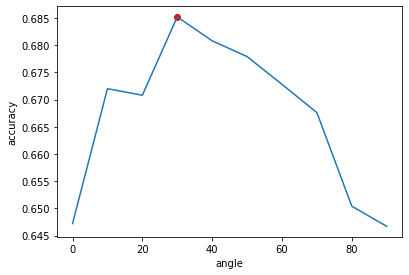

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6198
Accuracy after shear augmentation constrained by  0.4  is  0.6289
Accuracy after shear augmentation constrained by  0.6  is  0.6444
Accuracy after shear augmentation constrained by  0.8  is  0.6556
Accuracy after shear augmentation constrained by  1.0  is  0.6561
Accuracy after shear augmentation constrained by  1.2  is  0.6275
Accuracy after shear augmentation constrained by  1.4  is  0.6244
Accuracy after shear augmentation constrained by  1.6  is  0.596
Accuracy after shear augmentation constrained by  1.8  is  0.6067
Accuracy after shear augmentation constrained by  2.0  is  0.6345


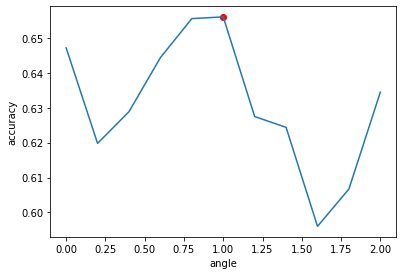

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6057
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.596
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.6142
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.6015
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.6103
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.5736
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6334
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.6096
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5994
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.5942
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.5971
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.6032
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.6162
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6335
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.5

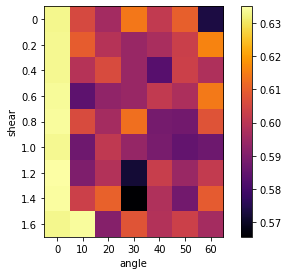

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno') 
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

## 1. What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?

### best angle constraint : 30
### best shear constraint :0.8
### angle constraint improves accuracy better than the shear constraint

## 2. Can you increase the accuracy by increasing the number of augmentations from each sample?

In [ ]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(10):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.66107749 0.77459821 0.38354272 0.67467634 0.90297975 0.09998525
 0.83051616 0.58174023 0.42235558 0.05171198 0.38407516 0.79388976
 0.54196432 0.17630796 0.2322215  0.84762057 0.43290759 0.09548693
 0.97333209 0.25346241 0.79648709 0.01280225 0.25650078 0.33712286
 0.85942527 0.74794816 0.30802123 0.78748291 0.81006012 0.51202083
 0.50788745 0.50952293 0.16739688 0.81273157 0.71460567 0.84938443
 0.81567433 0.78543717 0.78037666 0.94445068 0.60541099 0.82793647
 0.80134088 0.27023371 0.56572765 0.72969166 0.10346682 0.53058105
 0.00284001 0.24030204]
angle with constraint is: [ 1.61077489  2.74598206 -1.16457277  1.74676342  4.0297975  -4.00014747
  3.30516164  0.81740226 -0.77644422 -4.48288023 -1.15924836  2.93889762
  0.41964319 -3.23692038 -2.67778501  3.47620573 -0.67092406 -4.04513066
  4.73332091 -2.4653759   2.96487091 -4.87197754 -2.434992

In [ ]:
accuracies

array([0.6472, 0.6796, 0.6742, 0.6866, 0.6785, 0.6828, 0.6717, 0.6762,
       0.6646, 0.6627])

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(10):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.619
Accuracy after shear augmentation constrained by  0.4  is  0.6376
Accuracy after shear augmentation constrained by  0.6  is  0.647
Accuracy after shear augmentation constrained by  0.8  is  0.6587
Accuracy after shear augmentation constrained by  1.0  is  0.6557
Accuracy after shear augmentation constrained by  1.2  is  0.6522
Accuracy after shear augmentation constrained by  1.4  is  0.642
Accuracy after shear augmentation constrained by  1.6  is  0.6246
Accuracy after shear augmentation constrained by  1.8  is  0.621
Accuracy after shear augmentation constrained by  2.0  is  0.6268


In [ ]:
accuracies

array([0.6472, 0.619 , 0.6376, 0.647 , 0.6587, 0.6557, 0.6522, 0.642 ,
       0.6246, 0.621 , 0.6268])

### answer:No

## 3. try implementing a few augmentations of your own and experimenting with them?

### here i used two augmentations namely image shifting and image fliping

### 1.adding noise

In [ ]:
from skimage.util import random_noise
from skimage.filters import gaussian 

In [ ]:
def augNoise(sample, noiseconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  noise = rng.random(len(sample))
  noise = (noise-0.5)*noiseconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = random_noise(sample[ii], var=noise[ii]**2)
  return np.squeeze(nsample)

In [ ]:
noiseconstraints = [0.5, 1.0, 1.5, 2.0, 2.5] # the values we want to test
accuracies = np.zeros(len(noiseconstraints), dtype=np.float) # we will save the values here

for ii in range(len(noiseconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augNoise(train_X, noiseconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after noise augmentation constrained by ',noiseconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after noise augmentation constrained by  0.5  is  0.6582
Accuracy after noise augmentation constrained by  1.0  is  0.6776
Accuracy after noise augmentation constrained by  1.5  is  0.6824
Accuracy after noise augmentation constrained by  2.0  is  0.6805
Accuracy after noise augmentation constrained by  2.5  is  0.6692


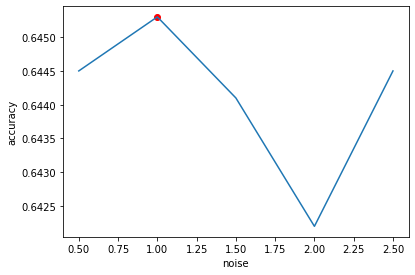

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(noiseconstraints, accuracies)
ax.set_xlabel('noise')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(noiseconstraints[maxind], accuracies[maxind], c='red')

### when noise data is augmented the accuracy remains unchanged

### 2. blurring image

In [ ]:
def augNoise(sample, blurconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = gaussian(sample[ii], sigma = blurconstraint, multichannel=True)
  return np.squeeze(nsample)

In [ ]:
blurconstraints = [0.5, 1.0, 1.5, 2.0, 2.5] # the values we want to test
accuracies = np.zeros(len(blurconstraints), dtype=np.float) # we will save the values here

for ii in range(len(blurconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augNoise(train_X, blurconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after blur augmentation constrained by ',blurconstraints[ii], ' is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Accuracy after blur augmentation constrained by  0.5  is  0.6582
Accuracy after blur augmentation constrained by  1.0  is  0.6776
Accuracy after blur augmentation constrained by  1.5  is  0.6824
Accuracy after blur augmentation constrained by  2.0  is  0.6805
Accuracy after blur augmentation constrained by  2.5  is  0.6692


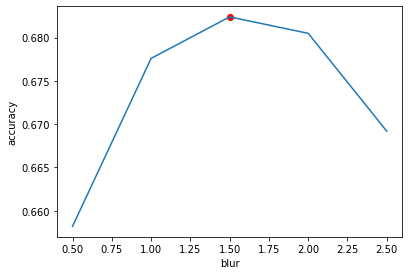

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(blurconstraints, accuracies)
ax.set_xlabel('blur')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(blurconstraints[maxind], accuracies[maxind], c='red')

### with blurred data the accuracy raises significantly.

## 4. Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

## combining both noise blur augmentations





In [ ]:
def augNoiseBlur(sample, noiseconstraint, blurconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0) 
  noise = rng.random(len(sample)) 
  noise = (noise-0.5)*noiseconstraint 
  blur = rng.random(len(sample)) 
  blur = (blur-0.5)*blurconstraint 
  nsample = sample.copy() 
  for ii in range(len(sample)):
    nsample[ii] = random_noise(gaussian(sample[ii], sigma=blurconstraint, multichannel=True), var=noise[ii]**2) 
  return np.squeeze(nsample) 

In [ ]:
noiseconstraints = [0.5, 1.0, 1.5, 2.0, 2.5]
blurconstraints = [0.5, 1.0, 1.5, 2.0, 2.5] # the values we want to test
hyp = cartesian((noiseconstraints, blurconstraints)) # cartesian product of both
accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augNoiseBlur(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation noise:',hyp[ii][0],  'blur:',hyp[ii][1], 'is ', accuracies[ii], flush=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Accuracy after augmentation noise: 0.5 blur: 0.5 is  0.6529
Accuracy after augmentation noise: 0.5 blur: 1.0 is  0.6692
Accuracy after augmentation noise: 0.5 blur: 1.5 is  0.6846
Accuracy after augmentation noise: 0.5 blur: 2.0 is  0.6607
Accuracy after augmentation noise: 0.5 blur: 2.5 is  0.6642
Accuracy after augmentation noise: 1.0 blur: 0.5 is  0.6537
Accuracy after augmentation noise: 1.0 blur: 1.0 is  0.6569
Accuracy after augmentation noise: 1.0 blur: 1.5 is  0.6504
Accuracy after augmentation noise: 1.0 blur: 2.0 is  0.6443
Accuracy after augmentation noise: 1.0 blur: 2.5 is  0.6408
Accuracy after augmentation noise: 1.5 blur: 0.5 is  0.6523
Accuracy after augmentation noise: 1.5 blur: 1.0 is  0.6574
Accuracy after augmentation noise: 1.5 blur: 1.5 is  0.658
Accuracy after augmentation noise: 1.5 blur: 2.0 is  0.6438
Accuracy after augmentation noise: 1.5 blur: 2.5 is  0.6105
Accuracy after augmentation noise: 2.0 blur: 0.5 is  0.6372
Accuracy after augmentation noise: 2.0 bl